In [55]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

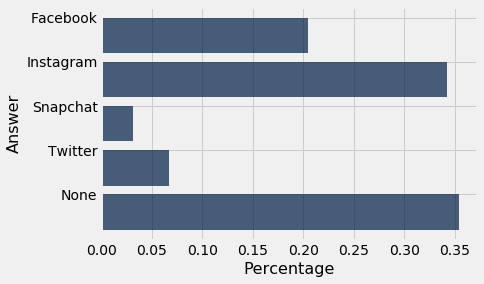

In [56]:
#How we plan to improve protoype: focus on attaching link to web app to instagram
influence = Table.read_table("WhatsgoodlyData-6.csv")
influence.where(1, "Mobile").barh("Answer", "Percentage")

In [57]:
consumption = Table.read_table("consumptionGrowthRate2008-2015.csv")
consumption

,2008 ($B),2009 ($B),2010 ($B),2011 ($B),2012 ($B),2013 ($B),2014 ($B),2015 ($B),Compound Growth Rate 2008-2015
Personal consumption expenditures,10013.6,9847,10202.2,10689.3,11050.6,11361.2,11863.4,12283.7,0.0296201
Household consumption expenditures 1,9731.5,9571,9926.8,10414.3,10757.8,11056.3,11549.8,11955.8,0.0298436
Food and beverages purchased for off-premises consum ...,772.9,770,788.9,829.1,848.8,857.5,891.4,900.7,0.0221011
Food and nonalcoholic beverages purchased for of ...,667.7,663.4,675.9,711.7,726.3,733.7,762.9,766.8,0.0199663
Alcoholic beverages purchased for off-premises c ...,104.7,106.1,112.6,117,122.1,123.3,127.9,133.3,0.0351025
Food produced and consumed on farms,0.4,0.4,0.4,0.4,0.4,0.5,0.6,0.6,0.059634
"Clothing, footwear, and related services",335.4,321.6,335.8,354.6,370.1,380,387.8,396.8,0.0243062
Clothing,274.2,263.1,274.3,289.3,301.2,308.1,314.3,321.8,0.023131
Garments,254.7,244.3,255.3,269.9,281.5,287.9,293.4,300.2,0.0237582
Women's and girls' clothing,152.1,145.8,152.8,161.6,169.2,172.6,175.8,180.2,0.0245141


In [69]:
def totalexpend(x):
    a = make_array(consumption[x])
    return sum(a)

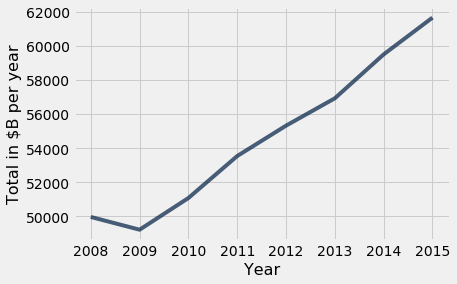

In [72]:
total_per_year = make_array(sum(totalexpend(1)), sum(totalexpend(2)),
                            sum(totalexpend(3)), sum(totalexpend(4)),
                            sum(totalexpend(5)), sum(totalexpend(6)),
                            sum(totalexpend(7)), sum(totalexpend(8)))
consumption_total = Table().with_columns("Year", np.arange(2008, 2016, 1),
                                         "Total in $B per year", total_per_year)

#total expenditures per year. Drop from 2008 to 2009 is accounted by in the recession.
consumption_total.plot(0, 1)

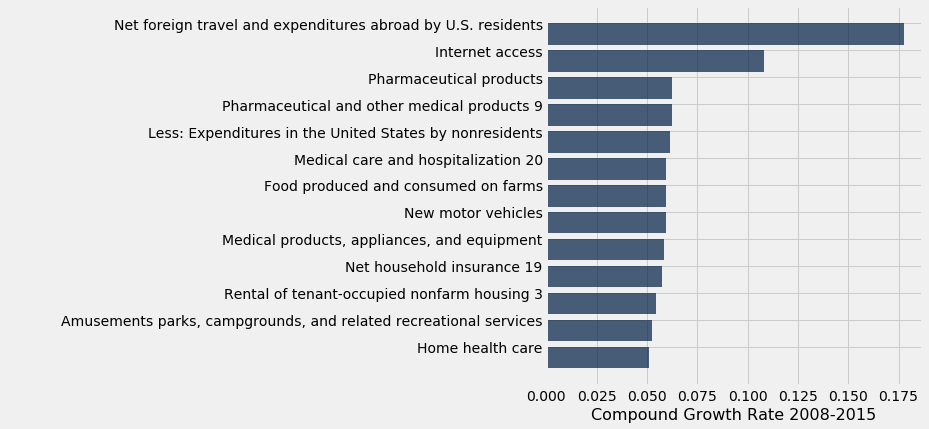

In [76]:
#Increase in consumption in these areas from 2008 to 2015, meaning more people want commodities in these areas
consumption.sort(9, descending = True).where(9, are.above(0.05)).barh(0, 9)

In [60]:
#Expenses that can be paid. See cp-2016-figure-1.xlsx in file folder or https://trends.collegeboard.org/college-pricing/figures-tables/average-estimated-undergraduate-budgets-2016-17
books = 1250
food = 500
transportation = 1160
books + food + transportation

2910

A USA Today article from 2006 includes this sentence: “Since 1970, the percentage of people ages 18 to 34 [in the United States] who live at home with their family increased 48%, from 12.5 million to 18.6 million, the Census Bureau says.”

The changes in the US population are relevant to the data in the article since the number of young adults living at home increasing by 48% is to be expected with an increase in population. More people living in cities and suburbs drive prices of homes up, making them less affordable for people starting out their careers. Also, even though family units are becoming smaller, a high influx of immigrants from Asian countries, Latin America, and other places have driven the size of the population up, and in most of those cultures, young adults tend to live at home for a longer period of time, which also affects the percentage increase in the number of people living at home between ages 18 and 34.

In [117]:
abc = Table.read_table("debt_amt_distribution2014.csv")
abc

Balance2014,NumberOfBorrowers
<$5001,"9,028,800"
betw $5000 and $10000,"7,785,500"
betw $10000 and $25000,"12,348,000"
betw $25000 and $50000,"7,997,000"
betw $50000 and $75000,"3,126,800"
betw $75000 and $100000,"1,238,100"
betw $100000 and $150000,"1,026,100"
betw $150000 and $200000,"444,200"
betw $200000+,"348,600"


In [101]:
def replace(x):
    return int(x.replace(",", ""))

In [110]:
bcd = abc.apply(replace, 1)
bcd

array([ 9028800,  7785500, 12348000,  7997000,  3126800,  1238100,
        1026100,   444200,   348600])

In [124]:
#Upper bound is arbitrarily defined based on scale from 100000 to 150000 and 150000 to 200000
new_table_debt = Table().with_columns("Balance 2014 (under $ given)", make_array(5000, 10000, 25000, 50000, 75000, 100000, 150000, 200000, 350000),
                                     "Number of Borrowers", bcd)

new_table_debt

Balance 2014 (under $ given),Number of Borrowers
5000,9028800
10000,7785500
25000,12348000
50000,7997000
75000,3126800
100000,1238100
150000,1026100
200000,444200
350000,348600


In [129]:
sum(new_table_debt[0] * new_table_debt[1])/sum(new_table_debt[1])

35868.085116200731

Average amount of debt is approximately 35,868 dollars but this will take around 10 years to pay off given that interest in compounded annually. Debt for a low income bracket is on average 8K higher than the average (Forbes). This accounts for even people whose parents can afford to pay for college, but may choose not to. In most families with higher net income that is 200,000 dollars plus, the amount of debt is significantly less (close to zero) since parents pay for most of the tuition.

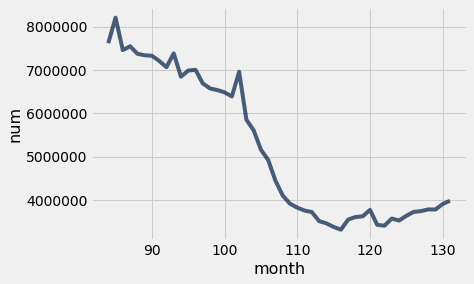

In [135]:
table_num_cred_used = Table.read_table("num_data_CRC.csv")
table_num_cred_used.where("group", "Seasonally Adjusted").where("month", are.between(84, 132)).plot("month", "num")

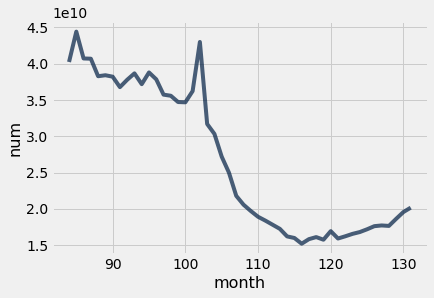

In [136]:
table_vol_cards = Table.read_table("vol_data_CRC.csv")
table_vol_cards.where("group", "Seasonally Adjusted").where("month", are.between(84, 132)).plot("month", "num")